# Spam Classifier NLP Project

An NLP(TF-IDF)-based spam classifier using machine learning.

NLP, or Natural Language Processing, is a field of artificial intelligence (AI) that focuses on the interaction between computers and human language. It involves the development of algorithms and models that enable machines to understand, interpret, and generate human language in a way that is both meaningful and useful.

Key aspects of NLP include:

1. Language Understanding: NLP aims to enable computers to comprehend the structure and meaning of human language, including text and speech. This involves tasks such as text classification, sentiment analysis, named entity recognition, and more.

2. Language Generation: NLP also encompasses tasks that involve generating human-like language. This includes chatbots, machine translation, text summarization, and content generation.

3. Language Processing: NLP technologies process and manipulate language data. This includes tasks like parsing, tokenization, and language modeling.

4. Speech Recognition and Synthesis: NLP extends to spoken language, where it involves converting spoken words into text (speech recognition) and generating spoken words from text (speech synthesis).

NLP has a wide range of applications, including:

- Virtual Assistants: Virtual assistants like Siri and Alexa use NLP to understand and respond to voice commands.
- Machine Translation: Services like Google Translate use NLP to translate text from one language to another.
- Sentiment Analysis: Companies use NLP to analyze customer reviews and social media sentiment to gauge public opinion.
- Text Summarization: NLP is used to automatically generate concise summaries of longer texts.
- Information Retrieval: Search engines employ NLP to understand search queries and deliver relevant results.
- Healthcare: NLP can help process medical records and extract valuable information for clinical decision support.

NLP technology relies heavily on machine learning and deep learning techniques, and it continues to advance rapidly, enabling more sophisticated interactions between humans and machines, as well as revolutionizing various industries through its practical applications.

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('spam.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
# Checking if the data has any missing data:

df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [5]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

Since there are 4825 ham messages or legitimate messages and only 747 spam messaages, it is not the best approach here to go with the over sampling approach as, if the data is increased the number of samples created for spam will also increase and this will not lead to good predictions, hence using the concept of under sampling manually

In [6]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']
print(ham.shape)
print(spam.shape)

(4825, 4)
(747, 4)


In [7]:
ham = ham.sample(spam.shape[0])
print(ham.shape)

(747, 4)


In [8]:
df_balanced = pd.concat([ham, spam], axis=0)

In [9]:
df_balanced.shape

(1494, 4)

In [10]:
df_balanced['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

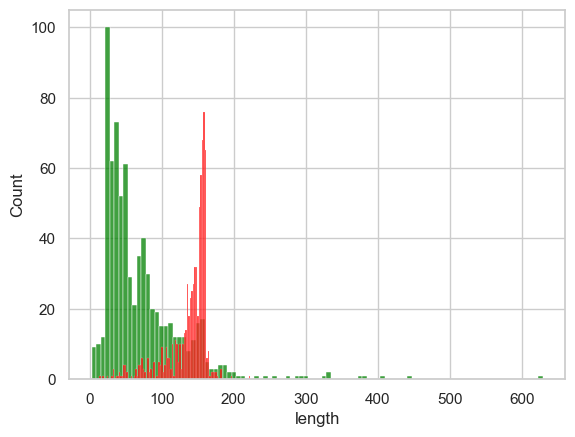

In [11]:
# Visualising the data to understand how spam and ham mails are distributed:

sns.histplot(data=df_balanced, x=df_balanced[df_balanced['label'] == 'ham']['length'], bins=100, color='green')
sns.histplot(data=df_balanced, x=df_balanced[df_balanced['label'] == 'spam']['length'], bins=100, color='red')
plt.show()

In [12]:
df_balanced[df_balanced['length'] > 450 ]

,label,message,length,punct
2434,ham,Indians r poor but India is not a poor country...,629,52


Can be observed that the maximum length of ham messages in this dataset is as high as 629 and that of spam message is less than 200

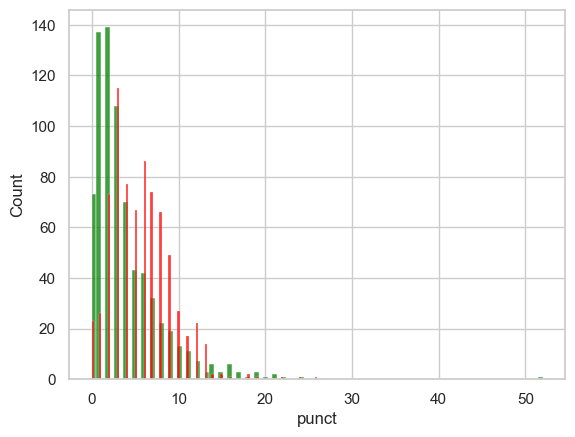

In [13]:
sns.histplot(data=df_balanced, x=df_balanced[df_balanced['label'] == 'ham']['punct'], bins=100, color='green')
sns.histplot(data=df_balanced, x=df_balanced[df_balanced['label'] == 'spam']['punct'], bins=100, color='red')
plt.show()

Here the number of punctuations used is almost the same for both ham and spam messages

In [14]:
# Splitting data into dependent and independent variables

x = df_balanced['message']
y = df_balanced['label']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [16]:
x_train.head()

3126    1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...
1217    You have 1 new voicemail. Please call 08719181...
2980    Xmas Offer! Latest Motorola, SonyEricsson & No...
1399     No did you check? I got his detailed message now
4055    dont make ne plans for nxt wknd coz she wants ...
Name: message, dtype: object

## Using NLP techniques to convert the text data into numeric to help build a machine learning model
## Using TF-IDF technique so that the model also understands the most significant words in the messages

TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a commonly used technique in Natural Language Processing (NLP) for text analysis and information retrieval. It is used to represent and measure the importance of words or terms within a collection of documents, such as a corpus, by assigning numerical values to them. TF-IDF helps in identifying the significance of a term in a document relative to its importance in the entire corpus. Here's a brief overview of TF-IDF:

1. Term Frequency (TF):
   - Term Frequency refers to the frequency of a term (word or phrase) within a specific document.
   - It is calculated by counting the number of times a term appears in a document and is often normalized to prevent bias towards longer documents.
   - The formula for TF is often represented as TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d).

2. Inverse Document Frequency (IDF):
   - Inverse Document Frequency measures the rarity or importance of a term across the entire corpus.
   - It is calculated by taking the logarithm of the total number of documents divided by the number of documents containing the term, and then adding 1 to avoid division by zero in case the term is not found in the corpus.
   - The formula for IDF is often represented as IDF(t, D) = log((Total number of documents in the corpus D) / (Number of documents containing term t in the corpus D)) + 1.

3. TF-IDF Score:
   - The TF-IDF score for a term in a document combines the term frequency and the inverse document frequency to quantify the importance of the term within that document and across the entire corpus.
   - It is calculated by multiplying the TF and IDF values: TF-IDF(t, d, D) = TF(t, d) * IDF(t, D).

4. Application:
   - TF-IDF is commonly used in information retrieval, text mining, and document classification tasks.
   - It helps in ranking documents based on their relevance to a given search query.
   - It can be used to identify key terms or words that are characteristic of a particular document or topic.

In practice, TF-IDF is often used to transform a collection of text documents into numerical vectors, where each term becomes a feature, and the TF-IDF score represents the importance of that term in the documents. These vectors can then be used for various NLP tasks, such as document classification, clustering, or information retrieval.

In [17]:
# Importing the required packages

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
pipeline_classify = Pipeline([('TF-IDF', TfidfVectorizer()), ('Classifier_Model', RandomForestClassifier())])

In [19]:
pipeline_classify.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier_Model', RandomForestClassifier())])

In [20]:
# Model Prediction

y_pred_train = pipeline_classify.predict(x_train)
y_pred_test = pipeline_classify.predict(x_test)

In [21]:
# Model Performance:

print('The classification report and confusion matrix for the Random forest classifier model is: ')
print('\n')
print('\n')
print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_train, y_pred_train))
print('--'*50)
print(confusion_matrix(y_train, y_pred_train))
print('--'*50)
print('The accuracy score for train data:', accuracy_score(y_train, y_pred_train))

print('The classification report and confusion matrix for Test data:')
print('\n')
print(classification_report(y_test, y_pred_test))
print('--'*50)
print(confusion_matrix(y_test, y_pred_test))
print('--'*50)
print('The accuracy score for test data:', accuracy_score(y_test, y_pred_test))

The classification report and confusion matrix for the Random forest classifier model is: 




The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       521
        spam       1.00      1.00      1.00       524

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

----------------------------------------------------------------------------------------------------
[[521   0]
 [  0 524]]
----------------------------------------------------------------------------------------------------
The accuracy score for train data: 1.0
The classification report and confusion matrix for Test data:


              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       226
        spam       1.00      0.89      0.94       223

    accuracy         

In [22]:
# Building XGBoost algorithm for the same balanced dataset

from xgboost import XGBClassifier

But XG Boost algorithm will not accept the data labels as spam and ham, hence need to be changed to 1 and 0 respectively

In [23]:
df_balanced['label'] = np.where(df_balanced['label'] == 'ham',0,1)

In [24]:
df_balanced['label'].value_counts()

label
0    747
1    747
Name: count, dtype: int64

In [25]:
x_train_xgb, x_test_xgb , y_train_xgb, y_test_xgb = train_test_split(df_balanced['message'], df_balanced['label'], test_size=0.3, random_state=101)

In [26]:
pipeline_classify_xgb = Pipeline([('TF-IDF', TfidfVectorizer()), ('Classifier_Model', XGBClassifier())])
pipeline_classify_xgb.fit(x_train_xgb, y_train_xgb)
pred_train_xgb = pipeline_classify_xgb.predict(x_train_xgb)
pred_test_xgb = pipeline_classify_xgb.predict(x_test_xgb)

In [27]:
# Model Performance:

print('The classification report and confusion matrix for the XG Boost Classifier model is: ')
print('\n')
print('\n')
print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_train_xgb, pred_train_xgb))
print('--'*50)
print(confusion_matrix(y_train_xgb, pred_train_xgb))
print('--'*50)
print('The accuracy score for train data:', accuracy_score(y_train_xgb, pred_train_xgb))

print('The classification report and confusion matrix for Test data:')
print('\n')
print(classification_report(y_test_xgb, pred_test_xgb))
print('--'*50)
print(confusion_matrix(y_test_xgb, pred_test_xgb))
print('--'*50)
print('The accuracy score for Test data:', accuracy_score(y_test_xgb, pred_test_xgb))

The classification report and confusion matrix for the XG Boost Classifier model is: 




The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       521
           1       1.00      0.99      1.00       524

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

----------------------------------------------------------------------------------------------------
[[521   0]
 [  4 520]]
----------------------------------------------------------------------------------------------------
The accuracy score for train data: 0.9961722488038277
The classification report and confusion matrix for Test data:


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       226
           1       0.96      0.87      0.91       223

    accurac

Now it is observed that Random Forest model is performing better compared to the XGB model, and using undersampling we are facing information loss as thousands of ham messages are being ommitted, to avoid this the model is to be trained with the entire data with the imbalance class labels

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=42)

In [29]:
pipeline_final = Pipeline([('TF_IDF', TfidfVectorizer()), ('Classifier_Model', RandomForestClassifier())])
pipeline_final.fit(x_train, y_train)
y_pred_train_final = pipeline_final.predict(x_train)
y_pred_test_final = pipeline_final.predict(x_test)

In [30]:
# Model Performance with the final model:

print('The classification report and confusion matrix using the Random forest classifier model for the full dataset: ')
print('\n')
print('\n')
print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_train, y_pred_train_final))
print('--'*50)
print(confusion_matrix(y_train, y_pred_train_final))
print('--'*50)
print('The accuracy score for train data:', accuracy_score(y_train, y_pred_train_final))

print('The classification report and confusion matrix for Train data:')
print('\n')
print(classification_report(y_test, y_pred_test_final))
print('--'*50)
print(confusion_matrix(y_test, y_pred_test_final))
print('--'*50)
print('The accuracy score for test data:', accuracy_score(y_test, y_pred_test_final))

The classification report and confusion matrix using the Random forest classifier model for the full dataset: 




The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3377
        spam       1.00      1.00      1.00       523

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900

----------------------------------------------------------------------------------------------------
[[3377    0]
 [   0  523]]
----------------------------------------------------------------------------------------------------
The accuracy score for train data: 1.0
The classification report and confusion matrix for Train data:


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       1.00      0.86      0.92       2

The model is performing excellently well, here the Precision is to be increased as we would not want to classify a Ham message into a spam message folder, i.e reducing False Positives.

In [31]:
def spam_classify(message):
    result = pipeline_final.predict([message])
    if result == 'spam':
        print('This is a spam!')
    else:
        print('This is a legitimate message')

Message 1:

Free entry into a wkly comp to win World Cup 2023 final tkts. Text CWC23 to 87121 to receive entry question(std txt rate)T&C's apply

In [32]:
spam_classify("Free entry into a wkly comp to win World Cup 2023 final tkts. Text CWC23 to 87121 to receive entry question(std txt rate)T&C's apply")

This is a spam!


Message 2:

Nah I don't think he goes so far just for the sake of it, he lives around here though.

In [34]:
spam_classify("Nah I don't think he goes so far just for the sake of it, he lives around here though.")

This is a legitimate message
